In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/aman/.local/lib/python3.6/site-packages/IPython/core/interactiveshel

In [2]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


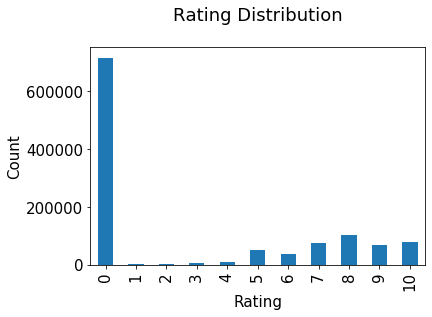

In [3]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [4]:
print(books.shape)
print(list(books.columns))


(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [5]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


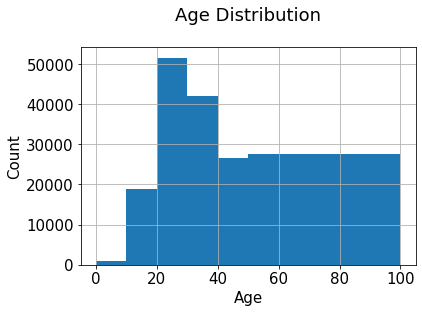

In [6]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [7]:
z=pd.DataFrame(ratings)
z=z.drop(columns=['userID'])
y=pd.merge(z, books , on='ISBN')
y.head()

,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [8]:
rating_count = pd.DataFrame(y.groupby('bookAuthor')['bookRating'].count())
r=rating_count.sort_values('bookRating', ascending=False).head()
r

,bookRating
bookAuthor,
Stephen King,10053
Nora Roberts,8429
John Grisham,6010
James Patterson,5845
Mary Higgins Clark,4777


In [9]:
a=r.drop(columns = ['bookRating'])
a=a.astype(object)
a.reset_index(inplace=True)
a.iloc[:,:]

,bookAuthor
0,Stephen King
1,Nora Roberts
2,John Grisham
3,James Patterson
4,Mary Higgins Clark


In [10]:
average_rating = pd.DataFrame(y.groupby('bookAuthor')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(y.groupby('bookAuthor')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
bookAuthor,,
Stephen King,3.606287,10053
Nora Roberts,2.659390,8429
John Grisham,3.192013,6010
James Patterson,3.143713,5845
Mary Higgins Clark,2.634080,4777


In [11]:
most_rated_books_summary = pd.merge(a, books , on='bookAuthor')
most_rated_books_summary.head()

,bookAuthor,ISBN,bookTitle,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,Stephen King,0671042858,The Girl Who Loved Tom Gordon,2000,Pocket,http://images.amazon.com/images/P/0671042858.0...,http://images.amazon.com/images/P/0671042858.0...,http://images.amazon.com/images/P/0671042858.0...
1,Stephen King,0451162072,Pet Sematary,1994,Signet Book,http://images.amazon.com/images/P/0451162072.0...,http://images.amazon.com/images/P/0451162072.0...,http://images.amazon.com/images/P/0451162072.0...
2,Stephen King,8484509141,Mientras Escribo,2002,Distribooks,http://images.amazon.com/images/P/8484509141.0...,http://images.amazon.com/images/P/8484509141.0...,http://images.amazon.com/images/P/8484509141.0...
3,Stephen King,0743424425,The Shining,2001,Pocket,http://images.amazon.com/images/P/0743424425.0...,http://images.amazon.com/images/P/0743424425.0...,http://images.amazon.com/images/P/0743424425.0...
4,Stephen King,0743211383,Dreamcatcher,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...


In [12]:
rating_count = pd.DataFrame(y.groupby('yearOfPublication')['bookRating'].count())
#rating_count.sort_values('bookRating', ascending=False).head()
r=rating_count.sort_values('bookRating', ascending=False)
r=r.head()
r

,bookRating
yearOfPublication,
2002,87276
2001,75309
1999,70208
2003,69219
2000,67578


In [13]:
a=r.drop(columns = ['bookRating'])
a=a.astype(object)
a.reset_index(inplace=True)
a.iloc[:,:]

,yearOfPublication
0,2002
1,2001
2,1999
3,2003
4,2000


In [14]:
average_rating = pd.DataFrame(y.groupby('yearOfPublication')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(y.groupby('yearOfPublication')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
yearOfPublication,,
2002,3.156217,87276
2001,3.072700,75309
1999,2.920736,70208
2003,3.123261,69219
2000,2.945234,67578


In [15]:
most_rated_books_summary = pd.merge(a, books , on='yearOfPublication')
most_rated_books_summary

,yearOfPublication,ISBN,bookTitle,bookAuthor,publisher,imageUrlS,imageUrlM,imageUrlL
0,2002,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2002,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
2,2002,3404921038,Wie Barney es sieht.,Mordecai Richler,LÃ?Â¼bbe,http://images.amazon.com/images/P/3404921038.0...,http://images.amazon.com/images/P/3404921038.0...,http://images.amazon.com/images/P/3404921038.0...
3,2002,0449005615,Seabiscuit: An American Legend,LAURA HILLENBRAND,Ballantine Books,http://images.amazon.com/images/P/0449005615.0...,http://images.amazon.com/images/P/0449005615.0...,http://images.amazon.com/images/P/0449005615.0...
4,2002,0425182908,Isle of Dogs,Patricia Cornwell,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...
5,2002,042518630X,Purity in Death,J.D. Robb,Berkley Publishing Group,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...,http://images.amazon.com/images/P/042518630X.0...
6,2002,0964778319,An Atmosphere of Eternity: Stories of India,David Iglehart,Sunflower Press,http://images.amazon.com/images/P/0964778319.0...,http://images.amazon.com/images/P/0964778319.0...,http://images.amazon.com/images/P/0964778319.0...
7,2002,2070423204,Lieux dits,Michel Tournier,Gallimard,http://images.amazon.com/images/P/2070423204.0...,http://images.amazon.com/images/P/2070423204.0...,http://images.amazon.com/images/P/2070423204.0...
8,2002,0743403843,Decipher,Stel Pavlou,Simon &amp; Schuster (Trade Division),http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...,http://images.amazon.com/images/P/0743403843.0...
9,2002,0316748641,Pasquale's Nose: Idle Days in an Italian Town,Michael Rips,Back Bay Books,http://images.amazon.com/images/P/0316748641.0...,http://images.amazon.com/images/P/0316748641.0...,http://images.amazon.com/images/P/0316748641.0...


In [16]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
r=rating_count.sort_values('bookRating', ascending=False).head()
r


,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [17]:
a=r.drop(columns = ['bookRating'])
a=a.astype(object)
a.reset_index(inplace=True)
a.iloc[:,:]

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [18]:
most_rated_books_summary = pd.merge(a, books , on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [19]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [21]:
with open("search.csv", 'a') as csvfile: 
    fields = ['userID','bookTitle', 'ISBN'] 
    writer = csv.DictWriter(csvfile, fieldnames = fields)
    writer.writeheader()

In [22]:
num=input("enter user id")
bum=input("enter book")

enter user id746785
enter bookClara Callan


In [23]:
fum=books.drop(columns = ['bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'])
fum.columns = ['ISBN', 'bookTitle']
fum.bookTitle=fum.bookTitle.astype(object)
fum.ISBN=fum.ISBN.astype(object)
fu=fum[fum.bookTitle==bum]
fu=fu.drop(columns=['bookTitle'])
fu=fu.to_numpy()
fu=fu[0,0]
fu


'0002005018'

In [24]:
fields = ['userID','bookTitle', 'ISBN'] 
mydict = [{'userID':num,'bookTitle':bum, 'ISBN':fu}]
with open("search.csv", 'a') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = fields)
    #writer.writeheader() 
    writer.writerows(mydict)

In [25]:
cooks=pd.read_csv("search.csv",header=0)
#cooks=pd.read_csv('search.csv', sep=';', error_bad_lines=False, encoding="latin-1")
print(list(cooks.columns))
cooks


['userID', 'bookTitle', 'ISBN']


,userID,bookTitle,ISBN
0,746785,Clara Callan,2005018


In [26]:
num=746785
cooks.bookTitle=cooks.bookTitle.astype(object)
cooks.ISBN=cooks.astype(object)
cooks.userID=cooks.userID.astype(object)

#cooks.columns=['userID','bookTitle','ISBN']
cu=cooks[cooks.userID==num]
cu=cu.drop(columns=['bookTitle','ISBN'])
cu=cu.to_numpy()
cu=cu[0,0]
#print(cu.shape())
#cu.head()
cu

746785

In [27]:

loca=users.drop(columns = ['Age'])
loca.columns = ['userID', 'Loocation']
loca.serID=loca.userID.astype(object)
#loca.Location=loca.Location.astype(object)
loc=loca[loca.userID==num]
loc=loc.drop(columns=['userID'])
loc=loc.to_numpy()

loc=loc[0,0]
loc


/home/aman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


IndexError: index 0 is out of bounds for axis 0 with size 0

In [28]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [29]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
bones_ratings = ratings_pivot[fu]
similar_to_bones = ratings_pivot.corrwith(bones_ratings)

corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
c=corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)
c

,pearsonR,ratingCount
ISBN,,
0971880107,1.0,2502
0345361792,1.0,412
0446610038,1.0,391
0446605239,1.0,465
0440236673,1.0,408
0440221471,1.0,419
0385504209,1.0,883
0385265700,1.0,319
0375727345,1.0,552


In [41]:
print(list(c.columns))

['pearsonR', 'ratingCount']


In [42]:
b=c.drop(columns = ['pearsonR','ratingCount'])
b=b.astype(object)
b.reset_index(inplace=True)
b.iloc[:,:]

,ISBN
0,0971880107
1,0345361792
2,0446610038
3,0446605239
4,0440236673
5,0440221471
6,0385504209
7,0385265700
8,0375727345
9,0684872153


In [43]:
#books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  #index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(b, books, on='ISBN')
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0345361792,A Prayer for Owen Meany,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446605239,The Notebook,Nicholas Sparks,1998,Warner Books,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...,http://images.amazon.com/images/P/0446605239.0...
4,0440236673,The Brethren,John Grisham,2000,Island,http://images.amazon.com/images/P/0440236673.0...,http://images.amazon.com/images/P/0440236673.0...,http://images.amazon.com/images/P/0440236673.0...
5,0440221471,The Runaway Jury,JOHN GRISHAM,1997,Dell,http://images.amazon.com/images/P/0440221471.0...,http://images.amazon.com/images/P/0440221471.0...,http://images.amazon.com/images/P/0440221471.0...
6,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
7,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
8,0375727345,House of Sand and Fog,Andre Dubus III,2000,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...
9,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...


In [437]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [438]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [439]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [440]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [441]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [442]:
threshold = 50
rating_popular_bookpopularity_ = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [542]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains(loc)]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
171,147847,0060930535,0,The Poisonwood Bible: A Novel,133,"greenville, illinois, usa"
879,170634,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,105,"crystal lake, illinois, usa"
1066,147847,0316096199,0,Lucky : A Memoir,115,"greenville, illinois, usa"
1389,153718,0316602051,0,The Jester,68,"round lake, illinois, usa"
1550,147847,0316666343,0,The Lovely Bones: A Novel,272,"greenville, illinois, usa"


In [444]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [445]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Breath, Eyes, Memory:

1: Drowning Ruth, with distance of 0.7038114558809216:
2: Song of Solomon (Oprah's Book Club (Paperback)), with distance of 0.7179066065120301:
3: River, Cross My Heart, with distance of 0.7340442519963144:
4: We Were the Mulvaneys, with distance of 0.7447153665409483:
5: The Poisonwood Bible, with distance of 0.749411486149627:


In [446]:
us_canada_user_rating_pivot2 = us_canada_user_rating.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)
us_canada_user_rating_pivot2.head()

bookTitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,
254,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2766,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2977,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000
3363,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [447]:
us_canada_user_rating_pivot2.shape

(734, 746)

In [448]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(746, 734)

In [449]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(746, 12)

In [450]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(746, 746)

In [451]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Winter Solstice")
print(coffey_hands)

736


In [454]:
corr_coffey_hands  = corr[coffey_hands]
list(us_canada_book_title[(corr_coffey_hands>0.85)])

['Message in a Bottle',
 "Suzanne's Diary for Nicholas",
 'The Five People You Meet in Heaven',
 'The Horse Whisperer',
 'The Notebook',
 'The Rescue',
 "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
 'Winter Solstice']